# Methods for Data Science
### Deep Learning / Neural Networks and TensorFlow

## Contents

[1. Introduction](#introduction)

[2. TensorFlow Tensors and Variables](#tensors_and_variables)

[3. The Sequential class](#sequential)

[4. The tf.data module](#tf.data)

[5. TensorFlow regularisers, Dropout layers and callbacks](#tf_regularisation)

[6. CNNs and feature maps](#cnnsfeaturemaps)

[References](#references)

<a class="anchor" id="introduction"></a>
## Introduction

Welcome to the deep learning / neural networks section of the Methods for Data Science module! 

In this section of the course, you will learn the **fundamentals of deep learning models, as well as techniques for how to train, regularise and validate them**. 

We will cover widespread deep learning architectures such as the **multilayer perceptron (MLP)** and **convolutional neural network (CNN)**, with a focus on understanding the mathematical operations and transformations included in these models. We will also look at several popular **network optimisation algorithms**, as well as the **important error backpropagation algorithm**, which is central to the training of neural networks. **Regularisation techniques covered are weight regularisation, early stopping, and dropout**. 

The video content for this material is split into two types. There are standard 'lecture-style' videos, where the core material and theory behind deep learning models is presented, and then there are 'coding tutorial' videos, where you will learn to implement these concepts and ideas in the deep learning framework TensorFlow.

TensorFlow is an open source software library used for machine learning applications, especially deep learning. It uses symbolic mathematics (instead of purely numerical computations), which enables it to perform operations like automatic differentiation on a computational graph such as a neural network. Another major benefit is its ability to perform computations on GPU hardware, potentially leading to large speedups. 

This notebook contains many blank code cells in the sections listed above. The coding tutorial videos will step through the different parts of the TensorFlow library, and show you how to fill in these code cells. The idea is that you should follow along with these videos and code in all the examples yourself. This way, you will gain familiarity in how to use TensorFlow, and you should feel free to pause the video and try things out for yourself to gain a deeper understanding.

Throughout these coding tutorials, it is a good idea to use the [documentation](https://www.tensorflow.org/api_docs/python/tf) as a regular reference for the various functions and classes that we will be looking at. 

You will be able to run this notebook and follow the examples from the coding tutorial videos within the Anaconda environment you have installed for TensorFlow. 

<a class="anchor" id="tensors_and_variables"></a>
## TensorFlow Tensors and Variables

In this section we will introduce some fundamental building blocks and operations in TensorFlow. [Tensors](https://www.tensorflow.org/api_docs/python/tf/Tensor) and [Variables](https://www.tensorflow.org/api_docs/python/tf/Variable) are low-level objects that we will be using all the time in TensorFlow.

#### Tensors
You can think of Tensors as being multidimensional versions of vectors and arrays. Of course, these are the objects that Tensorflow gets its name from. When we build our neural network models, what we’re doing is defining a computational graph, where input data is processed through the layers of the network and sent through the graph all the way to the outputs. Tensors are the objects that get passed around within the graph, and capture those computations within the graph. 

Let’s take a look at some examples to get a better feel for how this works.

In [1]:
import tensorflow as tf

In [2]:
# Create a constant Tensor

a = tf.constant([1, 2, 3])
print(a)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


We can see that Tensors have `shape` and `dtype` properties, similar to NumPy arrays.

In [3]:
# Examine shape property

a.shape

TensorShape([3])

In [4]:
# Examine dtype property

a.dtype

tf.int32

Tensor objects can have different types, just like NumPy arrays. Take a look [here](https://www.tensorflow.org/api_docs/python/tf) for a complete list of available types.

In [5]:
# Create Tensor objects of different type

string_tensor = tf.constant(['Hello world!'], tf.string)
print(string_tensor)

float_tensor = tf.constant([3.14159, 2.71828], tf.float32)
print(float_tensor)

tf.Tensor([b'Hello world!'], shape=(1,), dtype=string)
tf.Tensor([3.14159 2.71828], shape=(2,), dtype=float32)


In [6]:
# Create a rank-2 Tensor 

b = tf.constant([[1.2, 0.4, 0.7], [-9.3, 4.5, 1.1]])
b

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.2,  0.4,  0.7],
       [-9.3,  4.5,  1.1]], dtype=float32)>

In [7]:
# Get Tensor rank

tf.rank(b)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [8]:
# Create a Tensor with tf.ones

tf.ones((2, 3))

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [9]:
# Create a Tensor with tf.zeros

tf.zeros((3,))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

We can convert a TensorFlow Tensor into a NumPy array using the `numpy` method.

In [10]:
# Convert Tensor to NumPy array

b_np = b.numpy()
b_np

array([[ 1.2,  0.4,  0.7],
       [-9.3,  4.5,  1.1]], dtype=float32)

We can compute Tensor multiplication using `tf.tensordot` (see the [docs](https://www.tensorflow.org/api_docs/python/tf/tensordot)). The `axes` argument can be an integer or list of integers. When it is a single integer `n`, the contraction is performed over the last `n` axes of the first Tensor and the first `n` axes of the second Tensor. If it is a list, then the elements of the list specify the axes to contract.

In [11]:
# Compute matrix-vector product

a = tf.cast(a, tf.float32)
tf.tensordot(b, a, axes=1)
tf.tensordot(b, a, axes=[[1], [0]])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.1, 3. ], dtype=float32)>

In the case of two rank-2 Tensors, we can use the `tf.linalg.matmul` function. (In fact, we can use rank >= 2 Tensors with `tf.linalg.matmul` - see the [docs](https://www.tensorflow.org/api_docs/python/tf/linalg/matmul).) 

In [12]:
# Use tf.linalg.matmul to compute product

## tf.linalg.matmul(b, a) (will cause error)
print(b.shape)
print(a.shape)

(2, 3)
(3,)


Useful operations to manipulate Tensor shapes are `tf.expand_dims`, `tf.squeeze` and `tf.reshape`.

In [13]:
# Add an extra dimension to a Tensor

a = tf.expand_dims(a, 1)
print(a.shape)

(3, 1)


In [14]:
# Use tf.matmul, tf.squeeze and tf.reshape

tf.linalg.matmul(b, a)
tf.squeeze(tf.linalg.matmul(b, a))
tf.reshape(tf.squeeze(tf.linalg.matmul(b, a)), [1, 2])

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[4.1, 3. ]], dtype=float32)>

It is also often useful to fill Tensors with random values.

In [15]:
# Create a random normal Tensor

tf.random.normal((3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-1.2550393 , -1.4020563 ,  2.0115278 ],
       [ 1.0358888 , -0.6250898 ,  0.07280702],
       [-1.024951  ,  0.4905068 , -0.31837013]], dtype=float32)>

In [16]:
# Create a random integer Tensor

tf.random.uniform(shape=(2, 4), minval=0, maxval=10, dtype='int32')

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[4, 7, 8, 6],
       [2, 5, 8, 0]], dtype=int32)>

#### McCulloch-Pitts neuron
As an example, we will use Tensors to implement the McCulloch-Pitts neuron for a simple logical function. The McCulloch-Pitts neuron operates on boolean inputs, and uses a threshold activation to produce a boolean output. The function can be written as

$$
f(\mathbf{x}) = 
\begin{cases}
1 \quad \text{if } \sum_i x_i \ge b\\
0 \quad \text{if } \sum_i x_i < b
\end{cases}
$$

In [17]:
# Define the AND function

def logical_and(x):
    # return True only if all the elements are 1
    
    return tf.cast(tf.math.greater_equal(tf.reduce_sum(x), tf.reduce_sum(tf.shape(x))), tf.int32)

In [18]:
# Test the AND function with a few examples

logical_and(tf.constant([1, 1]))
logical_and(tf.constant([1, 1, 0]))
logical_and(tf.ones((2, 3), dtype=tf.int32))

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [19]:
# Define the OR function

def logical_or(x):
    # return True if any of the elements are 1
    
    return tf.cast(tf.math.greater_equal(tf.reduce_sum(x), 1), dtype=tf.int32)

In [20]:
# Test the OR function with a few examples

logical_or(tf.constant([1,0]))
logical_or(tf.zeros((3, ), dtype=tf.int32))

<tf.Tensor: shape=(), dtype=int32, numpy=0>

*Exercise.* Define the function for the NOR operation below (all inputs must be zero) for inputs `x`. *Hint: use the* `tf.math.logical_not` *function.*

In [21]:
# Define the NOR function

def logical_nor(x):
    return tf.math.logical_not(tf.cast(logical_or(x), dtype = bool))

In [22]:
# Test the NOR function with a few examples
#tf.math.logical_not(logical_or(tf.constant([1, 0])))
print(logical_nor(tf.constant([1, 0])))  # False
print(logical_nor(tf.constant([0, 0])))  # True
print(logical_nor(tf.constant([0, 0, 0])))  # True
print(logical_nor(tf.constant([1, 0, 1])))  # False

tf.Tensor(False, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(False, shape=(), dtype=bool)


#### Variables
**Tensors are *immutable objects***; that is, their state cannot be modified. The operations they encapsulate (or the values of a constant Tensor) are fixed. **Variables are special kinds of Tensors that have *mutable state***, so their values can be updated. This is useful for parameters of a model, such as the weights and biases in a neural network.

In [23]:
# Create a TensorFlow Variable

initial_value = tf.random.normal((2, 2))
u = tf.Variable(initial_value)
u

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.37981462, 2.334625  ],
       [0.86625   , 0.75618726]], dtype=float32)>

This looks very similar to a Tensor. However, Variables come with extra methods for updating their state, such as **`assign`, `assign_add` and `assign_sub`**.

In [24]:
# Assign a new value to the Variable

new_value = 2. * tf.ones((2, 2))
u.assign(new_value)
u

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [25]:
# Add a value to the Variable

increment = tf.constant(([0., 0.], [1., 1.]))
u.assign_add(increment)
u

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[2., 2.],
       [3., 3.]], dtype=float32)>

In [26]:
# Subtract a value from the Variable

decrement = tf.constant(([2., 0.], [2., 0.]))
u.assign_sub(decrement)
u

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0., 2.],
       [1., 3.]], dtype=float32)>

We will often use Variables in operations within the computational graph. The result of the operation is a Tensor.

In [27]:
# Use a Variable in a simple operation

v = tf.Variable([2.6, -0.4])
s = v + 1
s

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3.6, 0.6], dtype=float32)>

#### The perceptron
The perceptron is also a linear binary classifier, but with more flexible weights. It can be written as the following function

$$
f(\mathbf{x}) = 
\begin{cases}
1 \quad \text{if } \sum_i w_i x_i + b \ge 0\\
0 \quad \text{if } \sum_i w_i x_i + b < 0
\end{cases}
$$

As an example, we will use Tensors and Variables to implement the perceptron classifier.

In [28]:
# Implement the weights and bias as Variables

weights = tf.Variable(tf.constant([1., 0.5]), name='weights')
bias = tf.Variable(tf.constant(-0.5), name='bias')

In [29]:
# Define the perceptron classifier

def perceptron(x):
    # compute the weighted sum and add the bias
    return tf.math.greater_equal(tf.tensordot(x, weights, axes=1) + bias, 0.)

In [30]:
# Create a random set of test points

## 100 test points, each of which is a rank 1 tensor of length 2 ##
x = tf.random.normal((100, 2))

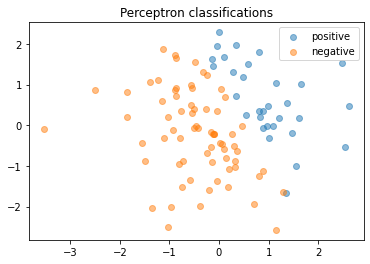

In [31]:
# Plot the points coloured by class prediction

import matplotlib.pyplot as plt

preds = perceptron(x)

positive_class = x[preds]
negative_class = x[~preds]

plt.scatter(positive_class[:, 0], positive_class[:, 1], alpha=0.5, label='positive')
plt.scatter(negative_class[:, 0], negative_class[:, 1], alpha=0.5, label='negative')
plt.title("Perceptron classifications")
plt.legend()
plt.show()

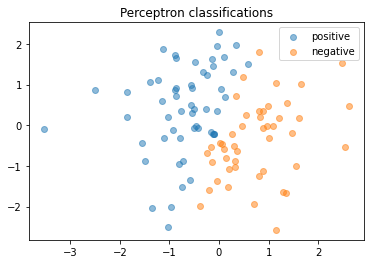

In [32]:
# Update the weights and bias and re-plot

weights.assign_sub(tf.constant([1.5, 0.3]))
bias.assign_add(tf.constant(0.5))

preds = perceptron(x)
positive_class = x[preds]
negative_class = x[~preds]

plt.scatter(positive_class[:, 0], positive_class[:, 1], alpha=0.5, label='positive')
plt.scatter(negative_class[:, 0], negative_class[:, 1], alpha=0.5, label='negative')
plt.title("Perceptron classifications")
plt.legend()
plt.show()

*Exercise.* Can you find weights and bias values to implement the NOT gate for $x\in\{0, 1\}$ and the XOR gate for $x\in\{0, 1\}^2$? If yes, what are the values? If no, why not?

<a class="anchor" id="sequential"></a>
## The Sequential class

There are multiple ways to build and apply deep learning models in Tensorflow, from high-level, quick and easy-to-use APIs, to low-level operations. In this section you will walk through the high-level Keras API for quickly building, training, evaluating and predicting from deep learning models. In particular, you will see how to use the `Sequential` class to implement MLP models.

In [33]:
import tensorflow as tf

#### The `Dense` layer

We will see how to build MLP models using the `Dense` layer class from TensorFlow. 

This class implements the layer transformation $\mathbf{h}^{(k+1)} = \sigma\left( \mathbf{W}^{(k)}\mathbf{h}^{(k)} + \mathbf{b}^{(k)} \right)$.

In [34]:
# Create a Dense layer

from tensorflow.keras.layers import Dense

## We select number of neurons and the activation function
dense_layer = Dense(4, activation='sigmoid')

In [35]:
# Inspect the layer parameters

dense_layer.variables

[]

TensorFlow models are designed to process batches of data at once, and **always expect inputs to have a batch dimension in the first axis**. For example, a batch of 16 inputs, each of which is a length 4 vector, should have a shape `[16, 4]`.

In [36]:
# Call the dense layer on an input to create the weights

## 2 is the batch size, 6 is the input size
x = tf.ones((2, 6))
y = dense_layer(x)

## y has shape (2, 4) since 2 is the batch size and 4 is the number of neurons in the dense layer
y

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0.7435823 , 0.2802776 , 0.08548039, 0.58872026],
       [0.7435823 , 0.2802776 , 0.08548039, 0.58872026]], dtype=float32)>

In [37]:
# Inspect the layer parameters

dense_layer.variables

[<tf.Variable 'dense/kernel:0' shape=(6, 4) dtype=float32, numpy=
 array([[-0.00987548, -0.1353119 , -0.6178202 ,  0.16230208],
        [-0.29707396,  0.7726079 , -0.20191962, -0.34518045],
        [ 0.7288687 , -0.44540495, -0.723178  ,  0.4562068 ],
        [ 0.6908859 , -0.39298385, -0.12885982,  0.32889736],
        [ 0.13618284, -0.00456488, -0.11903101, -0.4527413 ],
        [-0.18431628, -0.7374274 , -0.5793035 ,  0.20919317]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

Note that the parameters of the layer are Variable objects. This makes sense, as recall that Variables are mutable, and we will want to modify them during network training.

#### MLP (Multi-Layer Perceptron) model

To construct an MLP model, we stack multiple `Dense` layers together by passing them in a list to the `Sequential` API:

In [38]:
# Build an MLP model

from tensorflow.keras.models import Sequential

## build a 3 layer MLP
mlp = Sequential([
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    ## default activation is None (i.e. Linear)
    Dense(3)
])

The default value for the `activation` keyword argument is `None`, in which case no activation (linear activation) is applied.

In [39]:
# Call the model on an input to create the weights

x = tf.random.normal((2, 6))
y = mlp(x)
y
## Shape is (2, 3) since 2 is the batch size and 3 is the number of neurons in the final layer

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0.991125  , -1.5599725 , -1.0679101 ],
       [ 0.52331805, -0.11218223,  0.19028315]], dtype=float32)>

It is worth knowing that the `Sequential` class itself inherits from the `Layer` class, so all the same properties and methods are also available for `Sequential` models.

In [40]:
# Inspect the model parameters

mlp.weights

[<tf.Variable 'dense_1/kernel:0' shape=(6, 4) dtype=float32, numpy=
 array([[-0.3494238 ,  0.56566834,  0.48646617,  0.41783142],
        [-0.1487984 ,  0.00919217, -0.6701937 ,  0.71262205],
        [-0.3004569 ,  0.18899769, -0.5747181 , -0.5790259 ],
        [ 0.10835147,  0.56120133,  0.6063559 ,  0.6662613 ],
        [ 0.3703624 , -0.6304636 ,  0.59766734, -0.33812794],
        [-0.31822777, -0.26699543, -0.6032982 , -0.40450168]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.687851  , -0.4248228 ,  0.07293308,  0.2900378 ],
        [ 0.41995102,  0.8180805 ,  0.12920415, -0.5502218 ],
        [ 0.45933205,  0.3585748 ,  0.5649944 ,  0.8067141 ],
        [ 0.17679495,  0.5114426 , -0.27279848, -0.5721694 ]],
       dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dty

In [41]:
# Inspect the model layers

## We see 3 Dense Layer objects
mlp.layers

## To inspect the kernel of the 2nd Dense Layer:
mlp.layers[1].kernel

<tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
array([[ 0.687851  , -0.4248228 ,  0.07293308,  0.2900378 ],
       [ 0.41995102,  0.8180805 ,  0.12920415, -0.5502218 ],
       [ 0.45933205,  0.3585748 ,  0.5649944 ,  0.8067141 ],
       [ 0.17679495,  0.5114426 , -0.27279848, -0.5721694 ]],
      dtype=float32)>

In [42]:
# Print the model summary

mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (2, 4)                    28        
_________________________________________________________________
dense_2 (Dense)              (2, 4)                    20        
_________________________________________________________________
dense_3 (Dense)              (2, 3)                    15        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


`Sequential` models (and layers) also have `trainable_weights` and `non_trainable_weights` properties, as weights (Variables) that are created can be set to trainable or non-trainable.

#### Train an MLP model on the MNIST dataset
Multidimensional inputs (i.e., with rank >= 2) can also be processed by an MLP network by simply unrolling, or flattening the dimensions. This can be done easily using the `Flatten` layer.

In [43]:
# Load the MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Several datasets are available to load using the Keras API, see [the docs](https://www.tensorflow.org/api_docs/python/tf/keras/datasets).

In [44]:
# Inspect the data shapes

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

## each input is a black and white image with 28x28 pixels
## there are 60000 images in training set, and 10000 in the test set

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


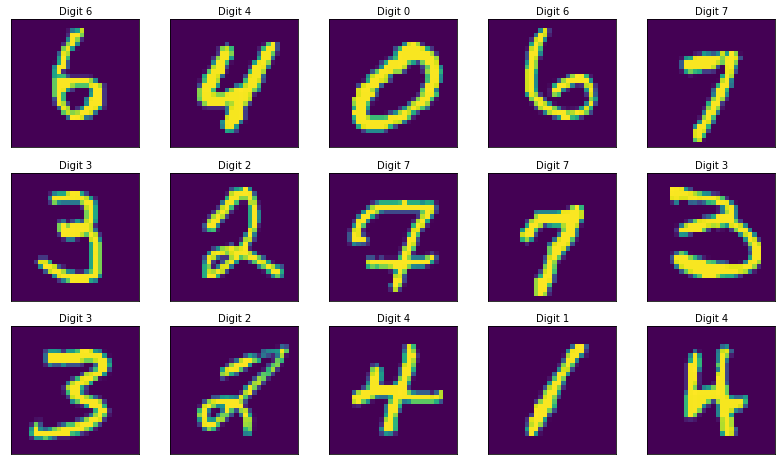

In [45]:
# View a few training data examples

import numpy as np
import matplotlib.pyplot as plt

n_rows, n_cols = 3, 5
random_inx = np.random.choice(x_train.shape[0], n_rows * n_cols, replace=False)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

for n, i in enumerate(random_inx):
    row = n // n_cols
    col = n % n_cols
    axes[row, col].imshow(x_train[i])
    axes[row, col].get_xaxis().set_visible(False)
    axes[row, col].get_yaxis().set_visible(False)
    axes[row, col].text(10., -1.5, f'Digit {y_train[i]}')
plt.show()

In [46]:
# Create an MNIST classifier model

from tensorflow.keras.layers import Flatten

# 3 dense layers with 64, 64 and 10 neurons respectively
mnist_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax'),
])
mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


To train the model, we need to specify a loss function to minimise, and an optimisation algorithm. **The average negative log-likelihood on the training set is given by the categorical cross entropy**

$$
L(\theta) = -\frac{1}{|\mathcal{D}_{train}|} \sum_{x_i\in\mathcal{D}_{train}}\sum_{j=1}^{10} \tilde{y}_{ij} \ln f_\theta(x_i)_j,
$$

where **$f_\theta$ is the neural network function** (with parameters $\theta$) that **outputs a length 10 probability vector $f_\theta(x_i)\in\mathbb{R}^{10}$** for an input example image $x_i\in\mathbb{R}^{28\times 28}$, and $\tilde{y}_{ij}$ is 1 if the correct label for example $i$ is $j$, and 0 otherwise.

As our labels **`y_train` and `y_test` are in sparse form** (NB as apposed to a vector of labels with 0s and 1 for the correct label for each input), we use the **`sparse_categorical_crossentropy`** loss function. We also will use the stochastic gradient descent (SGD) optimiser.

In [47]:
# Compile the model

mnist_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

The image data is filled with integer pixel values from 0 to 255. To facilitate the training, we rescale the values to the interval $[0, 1]$.

In [48]:
# Rescale the image data

x_train = x_train / 255.
x_test = x_test / 255.

In [49]:
# Train the model

## an epoch is one complete pass through the training set
history = mnist_model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 1.2681 - accuracy: 0.6620
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.4511 - accuracy: 0.8838
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3598 - accuracy: 0.9010: 0s
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3108 - accuracy: 0.9124
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2884 - accuracy: 0.9186
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2696 - accuracy: 0.9218
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2603 - accuracy: 0.9262
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2438 - accuracy: 0.9297
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2303 - accuracy: 0.9339
Epoch 10/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2166 - accuracy: 0.

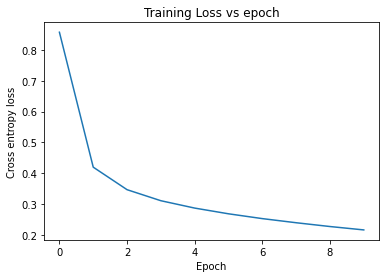

In [50]:
# Plot the learning curve

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.title("Training Loss vs epoch")
plt.show()

In [51]:
# Evaluate the model on the test set

mnist_model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 933us/step - loss: 0.2087 - accuracy: 0.9405


[0.20871171355247498, 0.940500020980835]

In [52]:
# Get predictions from model

preds = mnist_model.predict(x_test)
## Our predictions consist of probabilities for each class for each input
preds.shape

(10000, 10)

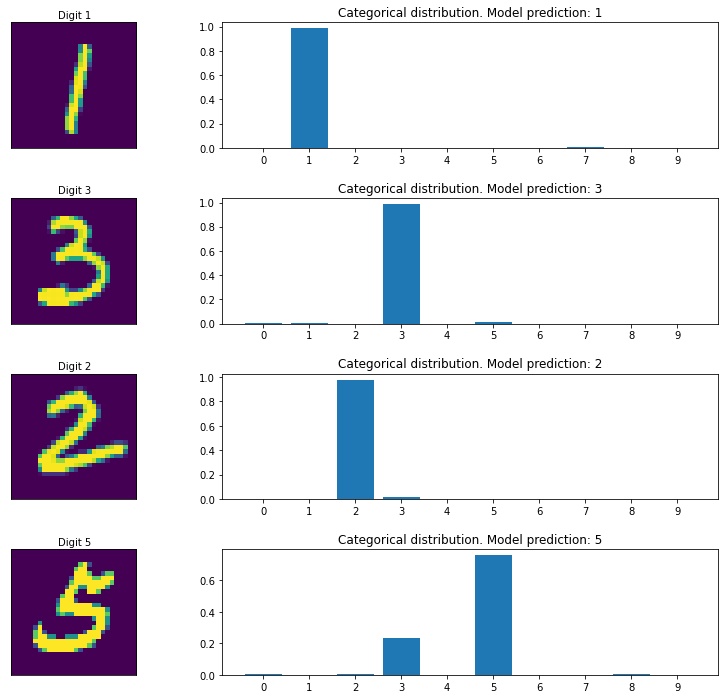

In [53]:
# Plot some predicted categorical distributions

## Get the porbabilities for four randomly selected images from the test set
## Display the images along with the predicted distribution and the correct label

num_test_images = x_test.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_preds = preds[random_inx, ...]
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(random_preds, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
plt.show()

*Exercise.* The MNIST dataset is an easy dataset, and the above model is far from optimal. Try experimenting with longer training times and/or model architecture changes to see if you can improve on the performance.

<a class="anchor" id="tf.data"></a>
## The `tf.data` module

In this section we will introduce a standard data processing pipeline in TensorFlow, using the `tf.data` module.

In [54]:
import tensorflow as tf

#### The Fashion-MNIST dataset
We will build a deep learning classifier on the Fashion-MNIST dataset to demonstrate the use of the `tf.data` module. First we load the dataset using the Keras API.

In [55]:
# Load the Fashion-MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [56]:
# Get the class labels

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

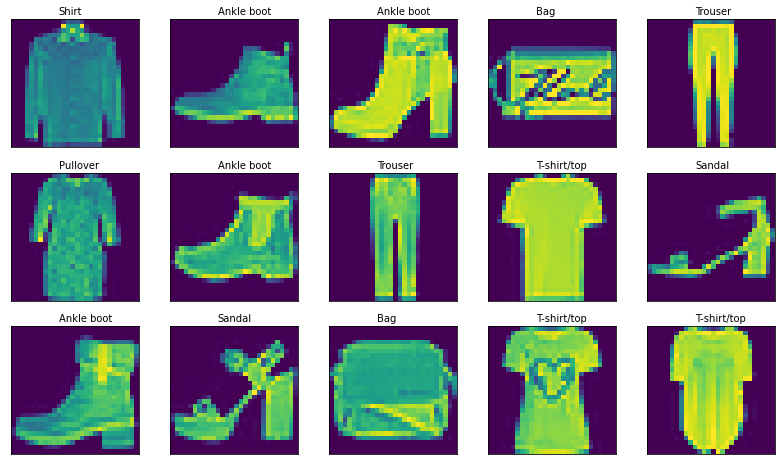

In [57]:
# View a few training data examples

import numpy as np
import matplotlib.pyplot as plt

n_rows, n_cols = 3, 5
random_inx = np.random.choice(x_train.shape[0], n_rows * n_cols, replace=False)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

for n, i in enumerate(random_inx):
    row = n // n_cols
    col = n % n_cols
    axes[row, col].imshow(x_train[i])
    axes[row, col].get_xaxis().set_visible(False)
    axes[row, col].get_yaxis().set_visible(False)
    axes[row, col].text(10., -1.5, f'{classes[y_train[i]]}')
plt.show()

In [58]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

fashion_mnist_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10)
], name='fashion_mnist_classifier')

In [59]:
# Print the model summary

fashion_mnist_model.summary()

Model: "fashion_mnist_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


The main class that we will be working with is the `Dataset` class from the `tf.data` module.

In [60]:
# Load the data into tf.data.Dataset objects

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

## Each input is 28x28, its an integer type, the labels are scalar integers
train_dataset.element_spec

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None),
 TensorSpec(shape=(), dtype=tf.uint8, name=None))

In [61]:
# Iterate over the Dataset object

## Take the first two elements in the train dataset
for inputs, labels in train_dataset.take(2):
    print(type(inputs))
    print(type(labels))
    print(inputs.shape)
    print(labels.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(28, 28)
()
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(28, 28)
()


**`Dataset` objects come with `map` and `filter` methods for data preprocessing on the fly.** For example, we can normalise the pixel values to the range $[0, 1]$ with the `map` method:

In [62]:
# Normalise the pixel values

def normalise_pixels(image, label):
    return (tf.cast(image, tf.float32) / 255., label)

train_dataset = train_dataset.map(normalise_pixels)
test_dataset = test_dataset.map(normalise_pixels)

train_dataset.element_spec

(TensorSpec(shape=(28, 28), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.uint8, name=None))

**We could also filter out data examples according to some criterion with the `filter` method.** For example, if we wanted to exclude all data examples with label $9$ from the training:

In [63]:
# Filter out all examples with label 9 (ankle boot)


train_dataset = train_dataset.filter(lambda x, y: tf.math.logical_not(tf.equal(y, 9)))
test_dataset = test_dataset.filter(lambda x, y: tf.math.logical_not(tf.equal(y, 9)))

In [64]:
# Shuffle the training dataset

## The buffer is fills with 1024 data examples and randomly samples from this buffer
train_dataset = train_dataset.shuffle(buffer_size=1024)

In [65]:
# Batch the datasets

batch_size = 64
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [66]:
# Print the element_spec

train_dataset.element_spec

## Each element this dataset returns has an extra dimension at the beginning which is the batch size
## Printed out as None as this is variable (e.g. if not divisible by 64, the last batch will be < 64)

(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.uint8, name=None))

In [67]:
# Compile and fit the model

sgd = tf.keras.optimizers.SGD(learning_rate=0.005)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

fashion_mnist_model.compile(optimizer=sgd, loss=loss_fn, metrics=['accuracy'])
history = fashion_mnist_model.fit(train_dataset, epochs=10)

Epoch 1/10
844/844 [==============================] - 4s 4ms/step - loss: 1.6116 - accuracy: 0.4782
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.7161 - accuracy: 0.7658
Epoch 3/10
844/844 [==============================] - 3s 3ms/step - loss: 0.5980 - accuracy: 0.7993
Epoch 4/10
844/844 [==============================] - 4s 4ms/step - loss: 0.5432 - accuracy: 0.8166
Epoch 5/10
844/844 [==============================] - 4s 4ms/step - loss: 0.5141 - accuracy: 0.8223
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.4929 - accuracy: 0.8298
Epoch 7/10
844/844 [==============================] - 3s 3ms/step - loss: 0.4783 - accuracy: 0.8344
Epoch 8/10
844/844 [==============================] - 3s 3ms/step - loss: 0.4674 - accuracy: 0.8365
Epoch 9/10
844/844 [==============================] - 4s 4ms/step - loss: 0.4597 - accuracy: 0.8395
Epoch 10/10
844/844 [==============================] - 4s 5ms/step - loss: 0.4487 - accuracy: 0.8422

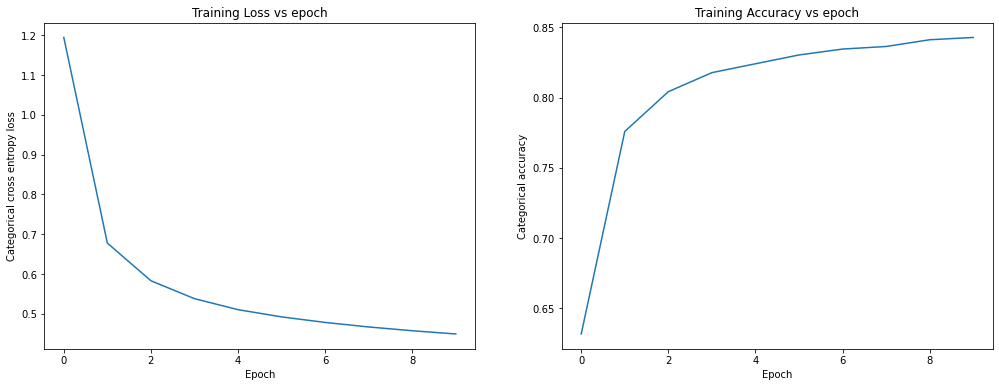

In [68]:
# Plot the learning curves

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(17, 6))
fig.add_subplot(121)
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Categorical cross entropy loss")
plt.title("Training Loss vs epoch")
fig.add_subplot(122)
plt.plot(history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Categorical accuracy")
plt.title("Training Accuracy vs epoch")
plt.show()

In [69]:
# Evaluate the model on the test set

fashion_mnist_model.evaluate(test_dataset)

## We see that the test loss and accuracy are comparable to that of the training set

141/141 [==============================] - 1s 3ms/step - loss: 0.4891 - accuracy: 0.8272


[0.4891131818294525, 0.8272222280502319]

In [70]:
# Get predictions from model

for images, labels in test_dataset.take(1):
    preds = fashion_mnist_model.predict(images)
    
    ## Our model returns the logit for these predictions and not the categoral probabilities for each class
    ## So we need to pass these through the softmax function
    preds = tf.nn.softmax(preds, axis = -1).numpy()

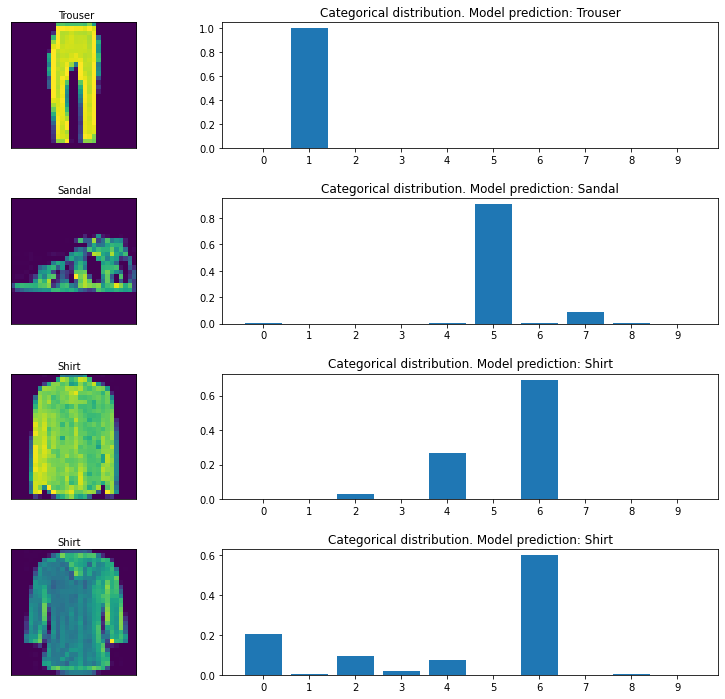

In [71]:
# Plot some predicted categorical distributions

## Plots some example images along with the true labels, 
## the categorical distribution output by the network and the predicted classes

num_test_images = preds.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_preds = preds[random_inx, ...]
random_test_images = images.numpy()[random_inx, ...]
random_test_labels = labels.numpy()[random_inx, ...]

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(random_preds, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'{classes[label]}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {classes[np.argmax(prediction)]}")
plt.show()

## Note we see that the model is not 100% accuracte, e.g. sometimes predicts T-shirt instead of dress

_Exercise._ Rewrite the model to make it a binary classifier, and change the dataset processing steps above, to map 'Sandal', 'Sneaker' and 'Ankle boot' to a single label 0, and all other categories to label 1.

<a class="anchor" id="tf_regularisation"></a>
## TensorFlow regularisers, Dropout layers and callbacks

In this section we will build on what we have covered already with the `Sequential` API, and include weight regularisers, `Dropout` layers, and introduce callback objects - these are very useful objects for dynamically performing operations during the training run. An example is the `EarlyStopping` callback.

In [72]:
import tensorflow as tf

For this tutorial we will use the diabetes dataset from `sklearn`.

In [73]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

In [74]:
# Print dataset description

print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [75]:
# Get the input and target data

print(diabetes_dataset.keys())
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [76]:
# Normalise the target data (this will make clearer training curves)

targets = (targets - targets.mean()) / targets.std()

In [77]:
# Partition the data into training and validation sets

from sklearn.model_selection import train_test_split

train_data, val_data, train_targets, val_targets = train_test_split(data, targets, test_size=0.2)

print(train_data.shape)
print(val_data.shape)
print(train_targets.shape)
print(val_targets.shape)

(353, 10)
(89, 10)
(353,)
(89,)


In [78]:
# Load the data into training, validation and test Dataset objects

train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_targets))
val_dataset = tf.data.Dataset.from_tensor_slices((val_data, val_targets))

train_dataset = train_dataset.shuffle(353)

train_dataset = train_dataset.batch(128)
val_dataset = val_dataset.batch(89)

## prefretching allows preprocessing for one batch to happen whilst another batch is being used with the model
## makes a difference large datasets with complex preprocessing
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [79]:
# Build the MLP model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(256, activation='relu', input_shape=(train_data.shape[-1],)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1)
])

In [80]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               2816      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 134,657
Trainable params: 134,657
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Compile the model

model.compile(optimizer='adam', loss='mse')

In [82]:
# Train the model, including validation

## NB the validation data isn't used for training
## but instead the model compiles the loss and other metrics on the validation data as well
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=False)

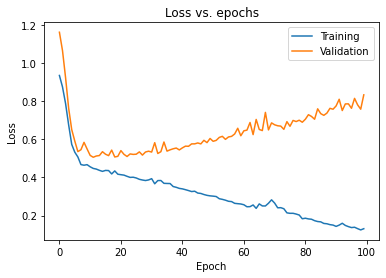

In [83]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

#### Regularise the model (to try and avoid the overfitting seen above)

Both $\mathcal{l}^2$ and $\mathcal{l}^1$ regularisation can easily be included using the `kernel_regularizer` and `bias_regularizer` keyword arguments in the `Dense` layer.

Dropout can also be easily included as an additional layer of our model.

In [84]:
# Redefine the model using l2 regularisation and dropout

from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

l2_coeff = 1e-5
rate = 0.5

def get_regularised_model():
    model = Sequential([
        Dense(256, kernel_regularizer=regularizers.l2(l2_coeff), activation='relu', input_shape=(train_data.shape[-1],)),
        Dropout(rate),
        Dense(256, kernel_regularizer=regularizers.l2(l2_coeff), activation='relu'),
        Dropout(rate),
        Dense(256, kernel_regularizer=regularizers.l2(l2_coeff), activation='relu'),
        Dropout(rate),
        Dense(1)
    ])
    return model

model = get_regularised_model()

In [85]:
# Compile the model

model.compile(optimizer='adam', loss='mse')

In [86]:
# Train the model, including validation

history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=False)

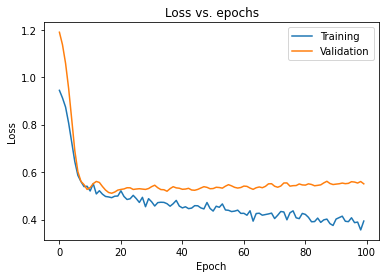

In [87]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

The $\mathcal{l}^2$ regularisation and dropout have helped to reduce the overfitting of the model. 

**We see that although the validation loss is still rising, the generalisation gap has closed.**

#### Callbacks
We can go one step further and **introduce early stopping as well**, and save the model weights at the best validation score. We can do this with callbacks.

In [88]:
# Create a new model

model = get_regularised_model()

In [89]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

The `EarlyStopping` callback is a built-in callback in the `tf.keras.callbacks` module. You can see a complete list of built-in callbacks [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks).

In [90]:
# Create an EarlyStopping callback

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=10)

In [91]:
# Train the model, including validation

history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=False,
                   callbacks=[earlystopping])

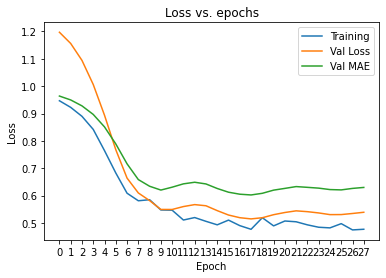

In [92]:
# Plot the training and validation metrics

import numpy as np

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_mae'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(len(history.history['loss'])))
plt.legend(['Training', 'Val Loss', 'Val MAE'], loc='upper right')
plt.show()

_Exercise._ Take a look at some more of the callbacks available in the [callbacks module](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) in TensorFlow, and have a go at implemented some of them in your model here.

<a class="anchor" id="cnnsfeaturemaps"></a>
## CNNs and feature maps

In this section we will use the `Conv2D` and `MaxPool2D` layer to implement the convolution and pooling operations described above, and see how these easily fits into our existing model-building workflow.

We will also see the effect of different kernel tensor choices on the output feature maps, and look at more complex feature maps from a pre-trained model.

In [93]:
import tensorflow as tf

The `Conv2D` and `MaxPool2D` classes are imported from the `tf.keras.layers` module just as the `Flatten` and `Dense` layers we have already worked with. Note that there are also 1-D and 3-D variants of these layers available, which both work in a similar way.

In [94]:
# Define a dummy model with Conv2D and MaxPool2D layers

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D

model = Sequential([
    ## first argument is the number of filters, second is the kernel window size
    Conv2D(8, (3, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D((2, 2)),
    ## the second argument being 3 means use a (3, 3) window size
    Conv2D(16, 3, activation='relu'),
    MaxPool2D(2)
])

In [95]:
# Print the model summary

model.summary()
## the last dimension in the shape refers to the number of filters / channels output by the layer

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 28, 8)         368       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
Total params: 1,536
Trainable params: 1,536
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Inspect the layer variables' shapes

## shape: (height, width, #channels into layer, #channels out of layer)
print(model.layers[0].kernel.shape)
print(model.layers[0].bias.shape)

print(model.layers[2].kernel.shape)
print(model.layers[2].bias.shape)

(3, 5, 3, 8)
(8,)
(3, 3, 8, 16)
(16,)


#### Edge detection filters
**The kernels (or filters) in CNNs are typically learned with backpropagation.** 

However, **simple low-level features such as edge detection kernels can also be designed by hand**. In this section we will see the output of such low-level kernels.

In [97]:
# Define a simple model with a Conv2D layer

model = Sequential([
    Conv2D(1, (3, 3), activation=None, use_bias=False, input_shape=(None, None, 1))
])

A **shape dimension of `None` indicates that the model can take flexible input sizes** in this dimension.

In [98]:
# Inspect the model's weights

model.weights

[<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 1, 1) dtype=float32, numpy=
 array([[[[ 0.3303067 ]],
 
         [[ 0.3188309 ]],
 
         [[-0.56394184]]],
 
 
        [[[ 0.42822826]],
 
         [[ 0.5208224 ]],
 
         [[-0.18335792]]],
 
 
        [[[ 0.01269567]],
 
         [[ 0.01756012]],
 
         [[-0.39252913]]]], dtype=float32)>]

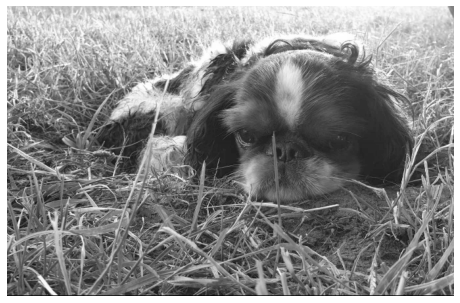

In [99]:
# Load an image as grayscale

import matplotlib.pyplot as plt

image = tf.io.read_file("./figures/oscar.png")
image = tf.io.decode_png(image, channels=1)
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

A simple and intuitive edge detection kernel is the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) **(a simple edge detection filter)**:

In [100]:
# Define simple edge detection filters

sobel_x = tf.constant([[1, 0, -1,], [2, 0, -2], [1, 0, -1]], dtype=tf.float32)
sobel_y = tf.constant([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=tf.float32)

print(sobel_x)

tf.Tensor(
[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]], shape=(3, 3), dtype=float32)


In [101]:
# Set the model kernel

## define a function that assigns the values of the kernel variable in our model with one of these arrays
def assign_filter(arr):
    ## NB we use newaxis to add extra dummy dimensions to match the required dimensions
    model.weights[0].assign(arr[:, :, tf.newaxis, tf.newaxis])

In [102]:
# Compute the feature maps

assign_filter(sobel_x)
# The ... add dummy dimensions like with newaxis
gx = model(image[None, ...])[0]

assign_filter(sobel_y)
gy = model(image[None, ...])[0]

## the total gradient magnitude (combining gx and gy)
g = tf.sqrt(tf.square(gx) + tf.square(gy))

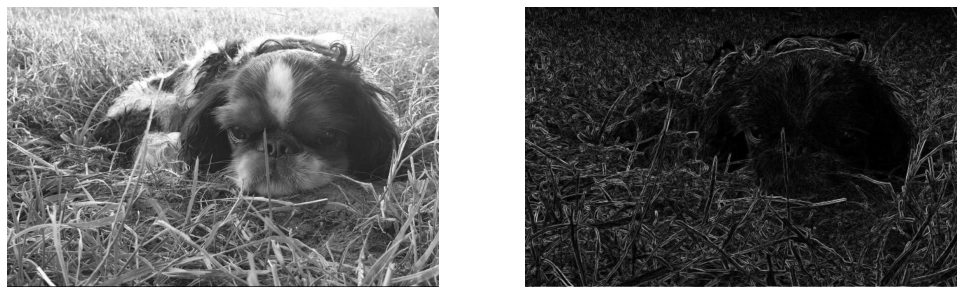

In [103]:
# View the image and feature map

fig = plt.figure(figsize=(17, 6))
fig.add_subplot(121)
plt.imshow(image, cmap='gray')
plt.axis('off')
fig.add_subplot(122)
plt.imshow(g, cmap='gray')  # First gx, then gy, then g
plt.axis('off')
plt.show()  # After executing, show the forehead markings with the cursor (after both gx and gy)

We see this simple hand crafted feature extractor **results in a feature map that provides useful information about the image**.

The **parameters** of such filters are **learned during training**.

#### Extract learned features from a pre-trained model
In this section we will load a CNN model that has been pre-trained on the [ImageNet](http://www.image-net.org) dataset, which is a large scale image classification dataset which to date has over 20,000 categories and over 14 million images. Large deep learning models trained on this dataset tend to learn general, useful representations of image features that can be used for a range of image processing tasks.

Below we will load the VGG-19 model ([Simonyan and Zisserman 2015](#Simonyan15)), which is available to load as a pre-trained model in the [`tf.keras.applications`](https://www.tensorflow.org/api_docs/python/tf/keras/applications) module. This might take a minute or two to download the first time you run the cell.

In [104]:
# Load the VGG-19 model (19 convolutional & dense layers in the model)

vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=False)

In [105]:
# Print the model summary

vgg.summary()

## The final dense layer also has a softmax activation (when input_top is True)
## The model was trained to predict the correct class from 1000 categories

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

**We will visualise the features extracted by this model at different levels of hierarchy** for the following image:

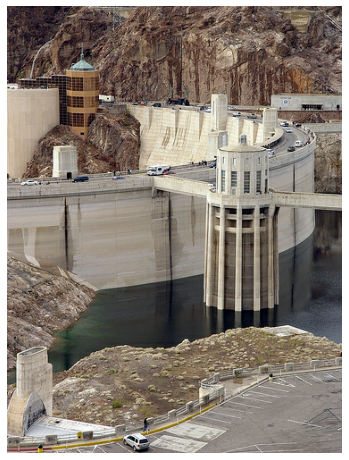

In [106]:
# Load a colour image

image = tf.io.read_file("./figures/hoover_dam.JPEG")
image = tf.io.decode_jpeg(image, channels=3)
plt.figure(figsize=(6, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

We will use the [functional API](https://www.tensorflow.org/guide/keras/functional) (more flexible than the sequential API) to create a multi-output model that **outputs different hidden layer outputs within the model**.

In [107]:
# Define the multi-output model

from tensorflow.keras.models import Model

## single input tensor
inputs = vgg.inputs

## 5 output tensors
layer_names = ['block1_conv2', 'block2_conv2', 'block3_conv4', 'block4_conv4', 'block5_conv4']
outputs = [vgg.get_layer(layer_name).output for layer_name in layer_names]


vgg_features = Model(inputs=inputs, outputs=outputs)

In [108]:
# View the model inputs and outputs Tensors

vgg_features.input
vgg_features.outputs

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv4')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv4')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv4')>]

In [109]:
# Extract the hierarchical features for this image

image_processed = tf.keras.applications.vgg19.preprocess_input(image)
features = vgg_features(image_processed[tf.newaxis, ...])
features = [image] + features

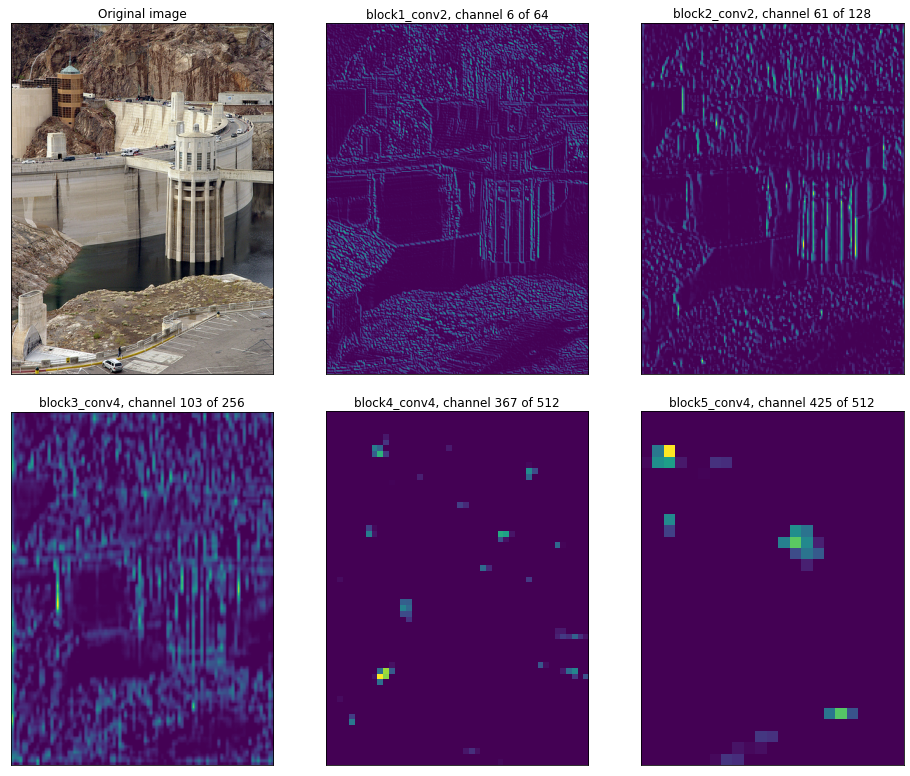

In [110]:
# Visualise the features

## Plot the original image and one of the feature maps from each of the output tensors returned by the model

import numpy as np

n_rows, n_cols = 2, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 14))
fig.subplots_adjust(hspace=0.05, wspace=0.2)

for i in range(len(features)):
    feature_map = features[i]
    num_channels = feature_map.shape[-1]
    row = i // n_cols
    col = i % n_cols
    if i == 0:
        axes[row, col].imshow(image)
        axes[row, col].set_title('Original image')
    else:
        random_feature = np.random.choice(num_channels)
        axes[row, col].imshow(feature_map[0, ..., random_feature])
        axes[row, col].set_title('{}, channel {} of {}'.format(layer_names[i-1], random_feature + 1, num_channels))
        
    axes[row, col].get_xaxis().set_visible(False)
    axes[row, col].get_yaxis().set_visible(False)
plt.show()

In the **deeper layers of the model, the features learned are increasingly abstract**, which makes them much more difficult to interpret.

They're not looking at lower level aspects like edges or textures anymore.

But instead they're combining these lower and mid-level representations of the data into a representation that has a higher level meaning.

*Exercise:* load one of your own images to view the features extracted by the VGG-19 network.

<a class="anchor" id="references"></a>
### References

* Chen, J. & Kyrillidis, A., (2019), "Decaying Momentum Helps Neural Network Training", arXiv preprint arXiv:1910.04952.
* Duchi, J., Hazan, E., & Singer, Y. (2011), "Adaptive Subgradient Methods for Online Learning and Stochastic Optimization", *Journal of Machine Learning Research*, **12**, 2121–2159.
* Dumoulin, V. & Visin, F. (2016), "A guide to convolution arithmetic for deep learning", arXiv preprint, abs/1603.07285.
* Hochreiter, S. (1991), "Untersuchungen zu dynamischen neuronalen Netzen", Diploma thesis, Institut für Informatik, Lehrstuhl Prof. Brauer, Technische Universität München.
* Kingma, D. P. & Ba, J. L. (2015), "Adam: a Method for Stochastic Optimization", International Conference on Learning Representations, 1–13.
* McCulloch, W. & Pitts, W. (1943), "A Logical Calculus of Ideas Immanent in Nervous Activity", Bulletin of Mathematical Biophysics, **5**, 127-147. 
* LeCun, Y., Boser, B., Denker, J. S., Henderson, D., Howard, R. E., Hubbard, W., & Jackel, L. D. (1989) "Backpropagation Applied to Handwritten Zip Code Recognition", AT&T Bell Laboratories.
* Mitchell, T. (1997), "Machine Learning", McGraw-Hill, New York.
* Nesterov, Y. (1983), "A method for unconstrained convex minimization problem with the rate of convergence o(1/k2)", Doklady ANSSSR (translated as Soviet. Math. Docl.), **269**, 543–547.
* Qian, N. (1999), "On the momentum term in gradient descent learning algorithms", Neural Networks: The Official Journal of the International Neural Network Society, **12** (1), 145–151.
* Robbins, H. and Monro, S. (1951), "A stochastic approximation method", *The annals of mathematical statistics*, 400–407.
* Rosenblatt, F. (1958), "The Perceptron: A Probabilistic Model for Information Storage and Organization in The Brain", Psychological Review, 65-386.
* Rosenblatt, F. (1961), "Principles of Neurodynamics. Perceptrons and the Theory of Brain Mechanisms", Defense Technical Information Center.
* Rumelhart, D. E., McClelland, J. L. and the PDP Research Group (1986a), "Parallel Distributed Processing: Explorations in the Microstructure of Cognition", MIT Press, Cambridge.
* Rumelhart, D. E., Hinton, G., & Williams, R. (1986b), "Learning representations by back-propagating errors", Nature, **323**, 533-536.
* Simonyan, K. and Zisserman, A. (2015), "Very Deep Convolutional Networks for Large-Scale Image Recognition", in *3rd International Conference on Learning Representations, (ICLR) 2015*, San Diego, CA, USA.
* Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014), "Dropout: A Simple Way to Prevent Neural Networks from Overfitting", Journal of Machine Learning Research, **15**, 1929-1958.